In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("AUDIO.csv")

In [5]:
df.head()

,ticker,date,open,high,low,close
0,AUDIO,2021-01-08,0.1806,0.1920,0.1766,0.1917
1,AUDIO,2021-01-09,0.1917,0.1951,0.1744,0.1833
2,AUDIO,2021-01-10,0.1833,0.2095,0.1822,0.1931
3,AUDIO,2021-01-11,0.1931,0.1954,0.1612,0.1681
4,AUDIO,2021-01-12,0.1681,0.1812,0.1660,0.1694


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  928 non-null    object 
 1   date    928 non-null    object 
 2   open    928 non-null    float64
 3   high    928 non-null    float64
 4   low     928 non-null    float64
 5   close   928 non-null    float64
dtypes: float64(4), object(2)
memory usage: 43.6+ KB


In [7]:
df=df.drop(columns="ticker",axis=1)

In [8]:
df.drop("date",axis=1,inplace=True)

In [9]:
df.head()

,open,high,low,close
0,0.1806,0.1920,0.1766,0.1917
1,0.1917,0.1951,0.1744,0.1833
2,0.1833,0.2095,0.1822,0.1931
3,0.1931,0.1954,0.1612,0.1681
4,0.1681,0.1812,0.1660,0.1694


Data Visualisation and EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='open', ylabel='close'>

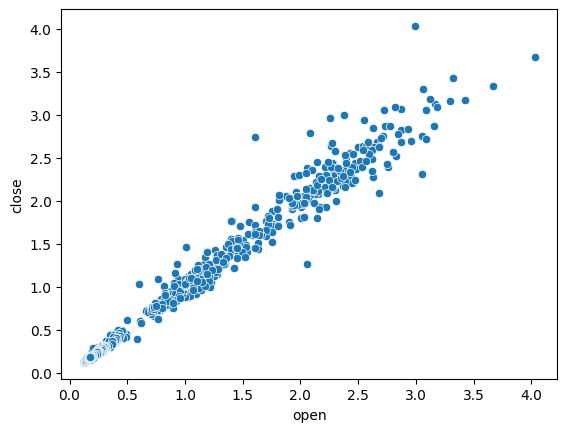

In [11]:
sns.scatterplot(df,x="open",y="close")

<Axes: xlabel='high', ylabel='close'>

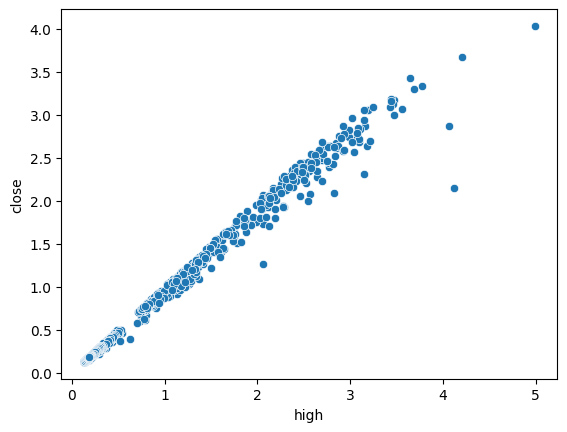

In [12]:
sns.scatterplot(df,x="high",y="close")

<Axes: xlabel='low', ylabel='close'>

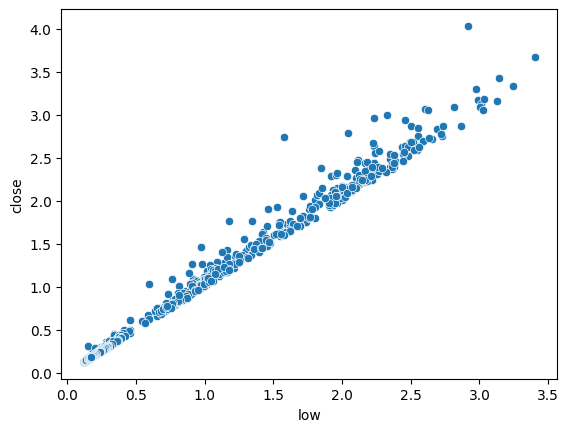

In [13]:
sns.scatterplot(df,x="low",y="close")

In [14]:
from sklearn.model_selection import train_test_split

x=df.loc[:,["open","high","low"]] #independent var
y=df["close"] #dependent var

In [15]:
x.head()

,open,high,low
0,0.1806,0.1920,0.1766
1,0.1917,0.1951,0.1744
2,0.1833,0.2095,0.1822
3,0.1931,0.1954,0.1612
4,0.1681,0.1812,0.1660


In [16]:
y.head()

0    0.1917
1    0.1833
2    0.1931
3    0.1681
4    0.1694
Name: close, dtype: float64

Spliting of data into train and test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_train

,open,high,low
571,0.345880,0.353053,0.335477
55,0.498300,0.790000,0.456800
683,0.155828,0.157539,0.151968
104,1.753000,2.130000,1.672000
74,1.752000,1.890000,1.639000
...,...,...,...
621,0.223400,0.230800,0.212179
915,0.194976,0.209755,0.186877
589,0.309429,0.311911,0.289149
401,1.080540,1.101660,1.028620


In [19]:
y_train

571    0.340510
55     0.608700
683    0.156369
104    1.702000
74     1.876000
         ...   
621    0.221378
915    0.192392
589    0.299079
401    1.048630
776    0.354625
Name: close, Length: 742, dtype: float64

Modelling

In [20]:
#linear regression
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()

In [21]:
model=Lr.fit(x_train,y_train)

In [22]:
model

LinearRegression()

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([1.73726797, 0.20533266, 0.80721085, 0.37386858, 0.23314393,
       1.05316241, 0.28362852, 0.13417497, 1.11921638, 0.17319303,
       0.43453139, 0.41990515, 0.76570516, 1.47237225, 0.30647565,
       0.33395598, 2.32290492, 0.18466919, 2.2590074 , 0.41952054,
       2.30623894, 0.31128952, 0.16991967, 0.3825623 , 0.36017599,
       1.25275507, 0.33589241, 2.05437868, 0.285256  , 2.07630084,
       0.15093016, 1.50929871, 0.88512425, 0.88246221, 0.16003461,
       0.28705226, 0.22320853, 0.65301471, 1.26458478, 0.32525344,
       0.2675108 , 0.32042274, 0.25748353, 0.29079361, 0.3479165 ,
       0.16570784, 0.32433022, 0.20559374, 1.41418698, 1.5643703 ,
       0.37328759, 1.42771424, 0.8414703 , 2.58218878, 1.0505538 ,
       0.31445403, 0.37280782, 0.42940703, 0.34105422, 0.23611095,
       0.41801856, 2.01717858, 0.91814679, 2.68292656, 1.32438779,
       0.22138467, 1.19019755, 1.14680992, 0.39792839, 0.26800698,
       0.29185128, 0.18665384, 0.32226276, 0.31963478, 0.20162

In [25]:
y_test

350    1.728040
879    0.203537
175    0.824500
505    0.370566
791    0.241578
         ...   
150    0.998300
786    0.258287
838    0.299130
841    0.283374
312    2.159000
Name: close, Length: 186, dtype: float64

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.995030549135518

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0030722656504142596

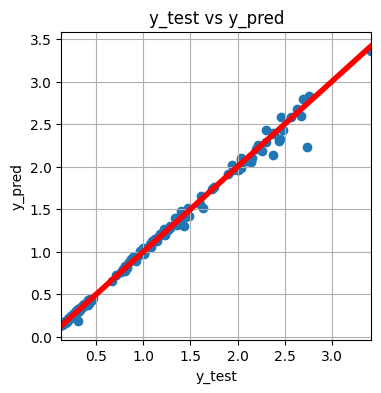

In [31]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4 , color='red')
plt.grid()
plt.xlim([y_test.min(), y_test.max()])
plt.show()


In [33]:
coeff = model.coef_
intercept = model.intercept_
col = x.columns
coeff, intercept


(array([-0.26987423,  0.44886207,  0.83188599]),
 np.float64(0.003750174400262707))

In [34]:
for col, coef in zip(x.columns, coeff):
    print(f"Coefficient for {col}: {coef:.4f}")




Coefficient for open: -0.2699
Coefficient for high: 0.4489
Coefficient for low: 0.8319


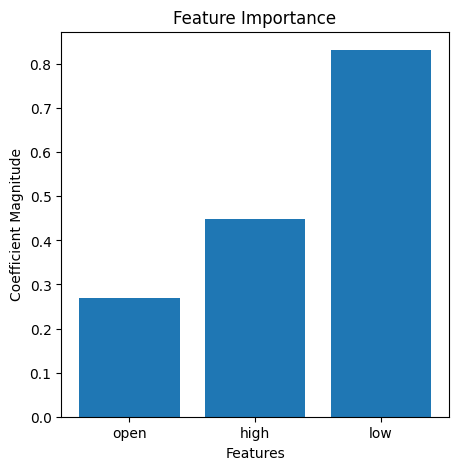

In [35]:
plt.figure(figsize=(5,5))
plt.bar(x.columns, np.abs(coeff))
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()
